<a href="https://colab.research.google.com/github/1234567890qqqqqq/bsc_dpdm22/blob/main/%5Bdataprep1%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
from google.colab import drive # เชื่อม google drive กับ colab ของเรา นี้เป็นคำสั่งเชื่อม |accout colab กับ Drive ควรเป็น accout เดียวกัน|
drive.mount('/content/drive')
import os # การจัดเก็บเกี่ยวกับไฟล์ต่าง ๆ มันอยู่ที่โฟลเดอร์ไหน จะ list โฟล์เดอร์ออกมา

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

In [3]:
import os
os.chdir('/content/drive/MyDrive/2 65/จารต้น 2/bsc_DMPM_data')
!pwd 
!ls

/content/drive/.shortcut-targets-by-id/10J08CTjLK79sRTVzHGISZcgQcbuCXU3f/bsc_DMPM_data
'Data Supply.xlsx'  'คำตอบนักประเมิน update.gsheet'
 seven_poi.csv	     คำตอบนักประเมิน.xlsx


In [4]:
sheet_id = '1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794'
sheet_name = 'land'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [5]:
jj = pd.read_csv(url)
jj

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,10000-22000,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,2,https://nayoo.co/khonkaen/posts/17145,ที่ดิน,มั่นใจ,3000000,2800000.0,"ราคาเสนอขาย 10,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์

In [6]:
data1 = pd.read_excel('/content/drive/MyDrive/2 65/จารต้น 2/bsc_DMPM_data/คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
data1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,5000000.0,"ราคาเสนอขาย 20,000-30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,7400000.0,"ราคาเสนอขาย 20,000 - 30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,ราคาเสนอขาย 3.5-4.0ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [7]:
data1.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
Unnamed: 13                        True
dtype: bool

In [8]:
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
data2 = pd.read_excel(link,sheet_name='land')
data2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,10000-22000,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
208,2,https://nayoo.co/khonkaen/posts/17145,ที่ดิน,มั่นใจ,3000000,2800000.0,"ราคาเสนอขาย 10,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [9]:
data2.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
dtype: bool

In [10]:
data3 = pd.read_excel('/content/drive/MyDrive/2 65/จารต้น 2/bsc_DMPM_data/คำตอบนักประเมิน.xlsx',sheet_name='คอนโด')
data3

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000.0,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000.0,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000.0,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,1609.0,คอนโด,มั่นใจ,1490000.0,1500000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,1640.0,คอนโด,มั่นใจ,1280000.0,1600000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,1,1641.0,คอนโด,มั่นใจ,4290000.0,2700000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000.0,1550000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,1840.0,คอนโด,มั่นใจ,3790000.0,2800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [11]:
data3.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
dtype: bool

In [12]:
data4 = pd.read_excel('/content/drive/MyDrive/2 65/จารต้น 2/bsc_DMPM_data/คำตอบนักประเมิน.xlsx',sheet_name='ทาวน์โฮม')
data4

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1430000.0,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1980000.0,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000.0,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000.0,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [13]:
data4.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                         True
Unnamed: 10                        True
Unnamed: 11                        True
Unnamed: 12                        True
dtype: bool

In [14]:
data5 = pd.read_excel('/content/drive/MyDrive/2 65/จารต้น 2/bsc_DMPM_data/คำตอบนักประเมิน.xlsx',sheet_name='อาคารพาณิชย์')
data5

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,"8,000-60,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,2200000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN


In [15]:
data5.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                    False
Unnamed: 9                        False
Unnamed: 10                       False
Unnamed: 11                        True
Unnamed: 12                        True
Unnamed: 13                        True
dtype: bool

##ผู้ประเมินคนที่ 1

In [16]:
dt1 = data1[data1['ID ผู้ประเมิน']==1]
dt1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,4500000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
156,1,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,5200000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
157,1,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,3600000.0,"3,000-30,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN,NaN
158,1,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,4000000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [17]:
dt1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,100.0,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,4.316360e+06,3.938500e+06,NaN,NaN,NaN,NaN,100.0
std,0.0,2.865391e+06,2.368553e+06,NaN,NaN,NaN,NaN,NaN
min,1.0,3.900000e+05,6.000000e+05,NaN,NaN,NaN,NaN,100.0
25%,1.0,2.892750e+06,2.775000e+06,NaN,NaN,NaN,NaN,100.0
50%,1.0,3.962000e+06,3.600000e+06,NaN,NaN,NaN,NaN,100.0
75%,1.0,5.000000e+06,4.500000e+06,NaN,NaN,NaN,NaN,100.0
max,1.0,2.094900e+07,1.600000e+07,NaN,NaN,NaN,NaN,100.0


In [18]:
dt1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [19]:
dt1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [20]:
from matplotlib import pyplot as plt

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3592 missing from current font.
  font.set_text(s

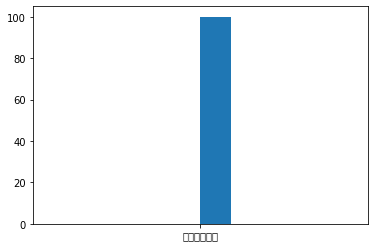

In [21]:
ret1_conf = plt.hist(dt1['ความมั่นใจในการเมินราคาทรัพย์'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3586 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s

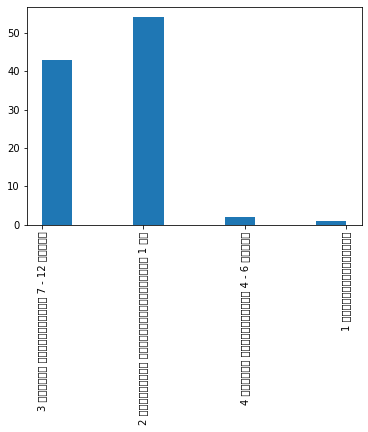

In [22]:
ret1_score = plt.hist(dt1['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical')

In [23]:
ret1_score

(array([43.,  0.,  0., 54.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [24]:
dt1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [25]:
dt1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
ให้คะแนนทรัพย์,,,,,,,,,,,,,
1 ขายไม่ได้แน่นอน,1,1,1,1,1,1,1,0,0,0,0,0,0
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,54,54,54,54,54,54,54,0,0,0,0,0,0
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,43,43,43,43,43,43,43,0,0,0,0,0,1
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2,2,2,0,0,0,0,0,0


In [26]:
dt1[dt1['ให้คะแนนทรัพย์']=='2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี'].count()

ID ผู้ประเมิน                     54
post id                           54
property_type                     54
ความมั่นใจในการเมินราคาทรัพย์     54
ราคาทรัพย์                        54
ประเมินราคาซื้อ-ขาย               54
ปัจจัยในการประเมินราคาซื้อ-ขาย    54
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    54
Unnamed: 9                         0
Unnamed: 10                        0
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        0
dtype: int64

In [27]:
dt1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##นักประเมินคนที่ 2

In [28]:
dt2 = data1[data1['ID ผู้ประเมิน']==2]
dt2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,5000000.0,"ราคาเสนอขาย 20,000-30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
186,2,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,7400000.0,"ราคาเสนอขาย 20,000 - 30,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
187,2,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN
188,2,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,3900000.0,ราคาเสนอขาย 3.5-4.0ล้านบาท/หลัง,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN


In [29]:
dtt2 = data1[data1['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(dtt2)}')

ประเมินทั้งหมด 90


In [30]:
dt2.describe()['ประเมินราคาซื้อ-ขาย']

count    8.900000e+01
mean     4.153258e+06
std      2.386901e+06
min      9.900000e+05
25%      2.600000e+06
50%      3.900000e+06
75%      4.900000e+06
max      1.700000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [31]:
dt2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

In [32]:
dt2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       89
ไม่มั่นใจ     1
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย
ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ
hint เริ่มต้นมาเราอยากได้ตารางรูปแบบนี้ก่อน

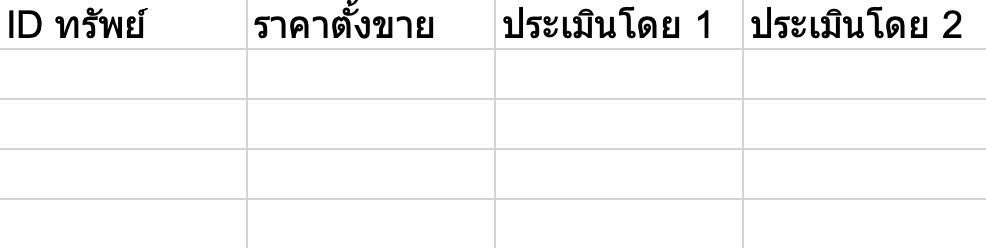

In [33]:
dt2['ประเมิน1'] = dt2['post id'].map(dt1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
dt2.head()

<ipython-input-33-fbe64aa62abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['ประเมิน1'] = dt2['post id'].map(dt1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,NaN,NaN,NaN,NaN,NaN,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,NaN,2500000.0


In [34]:
dt2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True) #rename column

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [35]:
df = dt2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']] #select columns
df

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [36]:
df.isnull().any() #Drop NaN

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2       True
dtype: bool

In [37]:
df = df.dropna()
df

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [38]:
df.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

###MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน

* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 12.321512246130807
* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 10.417687099245775

ผู้ประเมินคนที่ 2 ประเมินราคาบ้านได้ใกล้เคียงกว่าคนที่1

In [39]:
a = df['ราคาทรัพย์']
p1 = df['ประเมิน1']
p2 = df['ประเมิน2']

In [40]:
import numpy as np

def mape(a, p1): 
    a, p1 = np.array(a), np.array(p1)
    return np.mean(np.abs((a - p1) / a)) * 100
mape(a, p1)
     

12.321512246130807

In [41]:
import numpy as np

def mape(a, p2): 
    a, p2 = np.array(a), np.array(p2)
    return np.mean(np.abs((a - p2) / a)) * 100
mape(a, p2)

10.417687099245775

###MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์
* ผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 13.055527046371376
* ผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 8.521474003880796

In [42]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = df['ประเมิน1']
y_pred = df['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

13.055527046371376

In [43]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = df['ประเมิน2']
y_pred = df['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

8.521474003880796

###MAPE ผู้ประเมินเทียบผู้ประเมิน

* ผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 13.626068116793128
* ผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 11.582834887783596

In [44]:
import numpy as np

def mape(p1, p2): 
    p1, p2 = np.array(p1), np.array(p2)
    return np.mean(np.abs((p1 - p2) / p1)) * 100
mape(p1, p2)

13.626068116793128

In [45]:
import numpy as np

def mape(p2, p1): 
    p2, p1 = np.array(p2), np.array(p1)
    return np.mean(np.abs((p2 - p1) / p2)) * 100
mape(p2, p1)

11.582834887783596

#ประเมินที่ดิน

###คนที่1

In [46]:
t = data2[data2['ID ผู้ประเมิน']==1]
t.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
dtype: int64

In [47]:
t.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02,1.000000e+02
mean,1.0,1.586544e+07,9.069000e+06
std,0.0,4.078700e+07,2.322360e+07
min,1.0,6.500000e+05,5.000000e+05
25%,1.0,1.875000e+06,1.675000e+06
50%,1.0,3.999500e+06,3.175000e+06
75%,1.0,1.207500e+07,1.000000e+07
max,1.0,2.860000e+08,2.220000e+08


In [48]:
t['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [49]:
t['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

###คนที่2

In [50]:
tt = data2[data2['ID ผู้ประเมิน']==2]
tt.count()

ID ผู้ประเมิน                     100
post id                           100
property_type                     100
ความมั่นใจในการเมินราคาทรัพย์     100
ราคาทรัพย์                        100
ประเมินราคาซื้อ-ขาย               100
ปัจจัยในการประเมินราคาซื้อ-ขาย    100
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    100
dtype: int64

In [51]:
tt.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02,1.000000e+02
mean,2.0,1.586544e+07,1.196550e+07
std,0.0,4.078700e+07,2.843751e+07
min,2.0,6.500000e+05,7.000000e+05
25%,2.0,1.875000e+06,1.800000e+06
50%,2.0,3.999500e+06,3.800000e+06
75%,2.0,1.207500e+07,1.000000e+07
max,2.0,2.860000e+08,2.500000e+08


In [52]:
tt['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [53]:
tt['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

###คนที่3

In [54]:
ttt = data2[data2['ID ผู้ประเมิน']==4]
ttt.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย                6
ปัจจัยในการประเมินราคาซื้อ-ขาย     6
เหตุผลไม่มั่นใจราคาประเมิน         4
ให้คะแนนทรัพย์                     6
dtype: int64

In [55]:
ttt.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,10.0,1.000000e+01,6.000000e+00
mean,4.0,2.191000e+07,1.178333e+07
std,0.0,3.030465e+07,1.412097e+07
min,4.0,2.200000e+06,2.200000e+06
25%,4.0,3.750000e+06,4.375000e+06
50%,4.0,9.350000e+06,7.500000e+06
75%,4.0,1.610000e+07,9.500000e+06
max,4.0,9.000000e+07,4.000000e+07


In [56]:
ttt['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       6
ไม่มั่นใจ    4
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [57]:
ttt['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    4
1 ขายไม่ได้แน่นอน                     1
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน     1
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(ที่ดิน)ของนักประเมินแต่ละคนและของราคาตั้งขาย

In [58]:
tt['ประเมิน1'] = tt['post id'].map(t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
tt.head()

<ipython-input-58-171621c310d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['ประเมิน1'] = tt['post id'].map(t.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0


In [59]:
tt.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True) #rename column

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [60]:
d = tt[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']] #select columns
d

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [61]:
d.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน
* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 41.33784259452896

* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 40.11878038284342

ผู้ประเมินคนที่ 2 ประเมินราคาที่ดินได้ใกล้เคียงกว่าคนที่ 1

In [62]:
aa = d['ราคาทรัพย์']
pp1 = d['ประเมิน1']
pp2 = d['ประเมิน2']

In [63]:
import numpy as np

def mape(aa, pp1): 
    aa, pp1 = np.array(aa), np.array(pp1)
    return np.mean(np.abs((aa - pp1) / aa)) * 100
mape(aa, pp1)

40.83141479071181

In [64]:
import numpy as np

def mape(aa, pp2): 
    aa, pp2 = np.array(aa), np.array(pp2)
    return np.mean(np.abs((aa - pp2) / aa)) * 100
mape(aa, pp2)
     

39.55633058050656

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์
* ผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 83.48110682471777

* ผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 48.37938341613725

In [65]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = d['ประเมิน1']
y_pred = d['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

79.7394639675749

In [66]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = d['ประเมิน2']
y_pred = d['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

43.69974200199584

##MAPE ผู้ประเมินเป็นหลัก เทียบ ผู้ประเมิน

* ผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 74.07933970315449
* ผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 42.74775082762699

In [67]:
import numpy as np

def mape(pp1, pp2): 
    pp1, pp2 = np.array(pp1), np.array(pp2)
    return np.mean(np.abs((pp1 - pp2) / pp1)) * 100
mape(pp1, pp2)

74.07933970315449

In [68]:
import numpy as np

def mape(pp2, pp1): 
    pp2, pp1 = np.array(pp2), np.array(pp1)
    return np.mean(np.abs((pp2 - pp1) / pp2)) * 100
mape(pp2, pp1)

42.74775082762699

#คอนโด

###คนที่1

In [69]:
cd = data3[data3['ID ผู้ประเมิน']==1]
cd.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
dtype: int64

In [70]:
cd.describe()

,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9
count,10.0,10.000000,1.000000e+01,1.000000e+01,0.0,10.000000
mean,1.0,1188.900000,2.387800e+06,2.275000e+06,NaN,3.900000
std,0.0,694.328845,1.076989e+06,6.705098e+05,NaN,0.316228
min,1.0,32.000000,1.280000e+06,1.500000e+06,NaN,3.000000
25%,1.0,801.000000,1.625000e+06,1.650000e+06,NaN,4.000000
50%,1.0,1526.000000,1.895000e+06,2.250000e+06,NaN,4.000000
75%,1.0,1640.750000,3.234500e+06,2.775000e+06,NaN,4.000000
max,1.0,1840.000000,4.290000e+06,3.500000e+06,NaN,4.000000


In [71]:
cd['ให้คะแนนทรัพย์'].value_counts()

4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน     9
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน    1
Name: ให้คะแนนทรัพย์, dtype: int64

In [72]:
cd['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#ทาวน์โฮม

###คนที่1

In [73]:
th1 = data4[data4['ID ผู้ประเมิน']==1]
th1.count()

ID ผู้ประเมิน                     120
post id                           120
property_type                     120
ความมั่นใจในการเมินราคาทรัพย์     120
ราคาทรัพย์                        120
ประเมินราคาซื้อ-ขาย               120
ปัจจัยในการประเมินราคาซื้อ-ขาย    120
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    120
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         1
dtype: int64

In [74]:
th1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,120.0,1.200000e+02,1.200000e+02,0.0,0.0,0.0,0.0,1.0
mean,1.0,1.926117e+06,1.832750e+06,NaN,NaN,NaN,NaN,120.0
std,0.0,8.295864e+05,8.027065e+05,NaN,NaN,NaN,NaN,NaN
min,1.0,5.300000e+05,3.500000e+05,NaN,NaN,NaN,NaN,120.0
25%,1.0,1.345000e+06,1.300000e+06,NaN,NaN,NaN,NaN,120.0
50%,1.0,1.750000e+06,1.600000e+06,NaN,NaN,NaN,NaN,120.0
75%,1.0,2.437500e+06,2.500000e+06,NaN,NaN,NaN,NaN,120.0
max,1.0,4.730000e+06,4.200000e+06,NaN,NaN,NaN,NaN,120.0


In [75]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [76]:
th1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

###คนที่2

In [77]:
th2 = data4[data4['ID ผู้ประเมิน']==2]
th2.count()

ID ผู้ประเมิน                     120
post id                           120
property_type                     120
ความมั่นใจในการเมินราคาทรัพย์     120
ราคาทรัพย์                        120
ประเมินราคาซื้อ-ขาย               120
ปัจจัยในการประเมินราคาซื้อ-ขาย    120
เหตุผลไม่มั่นใจราคาประเมิน          0
ให้คะแนนทรัพย์                    120
Unnamed: 9                          0
Unnamed: 10                         0
Unnamed: 11                         0
Unnamed: 12                         0
dtype: int64

In [78]:
th2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,120.0,1.200000e+02,1.200000e+02,0.0,0.0,0.0,0.0,0.0
mean,2.0,1.926117e+06,1.823083e+06,NaN,NaN,NaN,NaN,NaN
std,0.0,8.295864e+05,7.744988e+05,NaN,NaN,NaN,NaN,NaN
min,2.0,5.300000e+05,4.000000e+05,NaN,NaN,NaN,NaN,NaN
25%,2.0,1.345000e+06,1.200000e+06,NaN,NaN,NaN,NaN,NaN
50%,2.0,1.750000e+06,1.700000e+06,NaN,NaN,NaN,NaN,NaN
75%,2.0,2.437500e+06,2.300000e+06,NaN,NaN,NaN,NaN,NaN
max,2.0,4.730000e+06,4.000000e+06,NaN,NaN,NaN,NaN,NaN


In [79]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [80]:
th2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

##เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(บ้าน)ของนักประเมินแต่ละคนและของราคาตั้งขาย

In [81]:
th2['ประเมิน1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head()

<ipython-input-81-e1980f55f3c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมิน1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,3520000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000.0,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,990000.0,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0


In [82]:
th2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True) #rename column

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [83]:
townhome = th2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']] #select columns
townhome

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [84]:
townhome.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน
* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 11.373507980201532
* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 8.766742521930592

ผู้ประเมินคนที่ 2 ประเมินราคาทาวน์โฮม ได้ใกล้เคียงกว่าคนที่1

In [85]:
aaa = townhome['ราคาทรัพย์']
ppp1 = townhome['ประเมิน1']
ppp2 = townhome['ประเมิน2']

In [86]:
import numpy as np

def mape(aaa, ppp1): 
    aaa, ppp1 = np.array(aaa), np.array(ppp1)
    return np.mean(np.abs((aaa - ppp1) / aaa)) * 100
mape(aaa, ppp1)

11.373507980201532

In [87]:
import numpy as np

def mape(aaa, ppp2): 
    aaa, ppp2 = np.array(aaa), np.array(ppp2)
    return np.mean(np.abs((aaa - ppp2) / aaa)) * 100
mape(aaa, ppp2)

8.766742521930592

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์
* ผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 16.209125736159383

* ผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 12.753580848193073

In [88]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = townhome['ประเมิน1']
y_pred = townhome['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

16.209125736159383

In [89]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = townhome['ประเมิน2']
y_pred = townhome['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

12.753580848193073

##MAPE ผู้ประเมินเป็นหลัก เทียบ ผู้ประเมิน
หา mean absolute percentage error

* ผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 11.21168528826893

* ผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 10.619748830198178

In [90]:
import numpy as np

def mape(ppp1, ppp2): 
    ppp1, ppp2 = np.array(ppp1), np.array(ppp2)
    return np.mean(np.abs((ppp1 - ppp2) / ppp1)) * 100
mape(ppp1, ppp2)

11.21168528826893

In [91]:
import numpy as np

def mape(ppp2, ppp1): 
    ppp2, ppp1 = np.array(ppp2), np.array(ppp1)
    return np.mean(np.abs((ppp2 - ppp1) / ppp2)) * 100
mape(ppp2, ppp1)
     

10.619748830198178

#อาคารพาณิชย์

###คนที่1

In [92]:
cb1 = data5[data5['ID ผู้ประเมิน']==1]
cb1.count()
     

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        1
dtype: int64

In [93]:
cb1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,10.0,1.000000e+01,1.000000e+01,0.0,10.000000,0.0,0.0,1.0
mean,1.0,7.710000e+06,6.260000e+06,NaN,2.700000,NaN,NaN,10.0
std,0.0,5.926110e+06,3.913850e+06,NaN,0.823273,NaN,NaN,NaN
min,1.0,2.400000e+06,2.200000e+06,NaN,2.000000,NaN,NaN,10.0
25%,1.0,4.125000e+06,3.650000e+06,NaN,2.000000,NaN,NaN,10.0
50%,1.0,6.000000e+06,5.000000e+06,NaN,2.500000,NaN,NaN,10.0
75%,1.0,8.500000e+06,7.750000e+06,NaN,3.000000,NaN,NaN,10.0
max,1.0,2.250000e+07,1.350000e+07,NaN,4.000000,NaN,NaN,10.0


In [94]:
cb1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [95]:
cb1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      2
Name: ให้คะแนนทรัพย์, dtype: int64

###คนที่2

In [96]:
cb2 = data5[data5['ID ผู้ประเมิน']==2]
cb2.count()

ID ผู้ประเมิน                     10
post id                           10
property_type                     10
ความมั่นใจในการเมินราคาทรัพย์     10
ราคาทรัพย์                        10
ประเมินราคาซื้อ-ขาย               10
ปัจจัยในการประเมินราคาซื้อ-ขาย    10
เหตุผลไม่มั่นใจราคาประเมิน         0
ให้คะแนนทรัพย์                    10
Unnamed: 9                        10
Unnamed: 10                       10
Unnamed: 11                        0
Unnamed: 12                        0
Unnamed: 13                        0
dtype: int64

In [97]:
cb2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,10.0,1.000000e+01,1.000000e+01,0.0,10.000000,0.0,0.0,0.0
mean,2.0,7.710000e+06,7.610000e+06,NaN,2.800000,NaN,NaN,NaN
std,0.0,5.926110e+06,5.408728e+06,NaN,0.918937,NaN,NaN,NaN
min,2.0,2.400000e+06,2.100000e+06,NaN,2.000000,NaN,NaN,NaN
25%,2.0,4.125000e+06,4.000000e+06,NaN,2.000000,NaN,NaN,NaN
50%,2.0,6.000000e+06,6.500000e+06,NaN,2.500000,NaN,NaN,NaN
75%,2.0,8.500000e+06,9.500000e+06,NaN,3.750000,NaN,NaN,NaN
max,2.0,2.250000e+07,2.000000e+07,NaN,4.000000,NaN,NaN,NaN


In [98]:
cb2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [99]:
cb2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      3
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     2
Name: ให้คะแนนทรัพย์, dtype: int64

###เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์(บ้าน)ของนักประเมินแต่ละคนและของราคาตั้งขาย

In [100]:
cb2['ประเมิน1'] = cb2['post id'].map(cb1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
cb2.head()

<ipython-input-100-817da5199e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2['ประเมิน1'] = cb2['post id'].map(cb1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,ประเมิน1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000.0,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,NaN,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000.0,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000.0,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN,NaN,2200000.0


In [101]:
cb2.rename(columns = {'ประเมินราคาซื้อ-ขาย' : 'ประเมิน2'}, inplace = True) #rename column

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [102]:
commercialbuilding = cb2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']] #select columns
commercialbuilding

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [103]:
commercialbuilding.isnull().any()

post id       False
ราคาทรัพย์    False
ประเมิน1      False
ประเมิน2      False
dtype: bool

##MAPE ราคาทรัพย์เป็นหลัก เทียบ ผู้ประเมิน
* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 17.643894993894996
* ราคาทรัพย์เป็นหลัก เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 11.732295482295482

ผู้ประเมินคนที่ 2 ประเมินราคาอาคารพาณิชย์ ได้ใกล้เคียงกว่าคนที่1

In [104]:
aaaa = commercialbuilding['ราคาทรัพย์']
pppp1 = commercialbuilding['ประเมิน1']
pppp2 = commercialbuilding['ประเมิน2']

In [105]:
import numpy as np

def mape(aaaa, pppp1): 
    aaaa, pppp1 = np.array(aaaa), np.array(pppp1)
    return np.mean(np.abs((aaaa - pppp1) / aaaa)) * 100
mape(aaaa, pppp1)

17.643894993894996

In [106]:
import numpy as np

def mape(aaaa, pppp2): 
    aaaa, pppp2 = np.array(aaaa), np.array(pppp2)
    return np.mean(np.abs((aaaa - pppp2) / aaaa)) * 100
mape(aaaa, pppp2)

11.732295482295482

MAPE ผู้ประเมินเป็นหลัก เทียบ ผู้ประเมิน
* ผู้ประเมินคนที่ 1 เทียบกับผู้ประเมินคนที่ 2 มีค่า MAPE เท่ากับ 21.58208906103643
* ผู้ประเมินคนที่ 2 เทียบกับผู้ประเมินคนที่ 1 มีค่า MAPE เท่ากับ 16.97142857142857

In [107]:
import numpy as np

def mape(pppp1, pppp2): 
    pppp1, pppp2 = np.array(pppp1), np.array(pppp2)
    return np.mean(np.abs((pppp1 - pppp2) / pppp1)) * 100
mape(pppp1, pppp2)

21.58208906103643

In [108]:
import numpy as np

def mape(pppp2, pppp1): 
    pppp2, pppp1 = np.array(pppp2), np.array(pppp1)
    return np.mean(np.abs((pppp2 - pppp1) / pppp2)) * 100
mape(pppp2, pppp1)


16.97142857142857

##MAPE ผู้ประเมินเป็นหลัก เทียบ ราคาทรัพย์
* ผู้ประเมินคนที่ 1 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 25.4518341307815

* ผู้ประเมินคนที่ 2 เป็นหลัก เทียบกับราคาทรัพย์มีค่า MAPE เท่ากับ 12.428571428571429

In [109]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = commercialbuilding['ประเมิน1']
y_pred = commercialbuilding['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

25.4518341307815

In [110]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = commercialbuilding['ประเมิน2']
y_pred = commercialbuilding['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

12.428571428571429

In [111]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = commercialbuilding['ประเมิน2']
y_pred = commercialbuilding['ราคาทรัพย์']
mean_absolute_percentage_error(y_true, y_pred) * 100

12.428571428571429

#Quiz2

##เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [112]:
check = t[['ประเมินราคาซื้อ-ขาย','ราคาทรัพย์']]
check

,ประเมินราคาซื้อ-ขาย,ราคาทรัพย์
0,1800000.0,2800000
3,8000000.0,14900000
6,18000000.0,90000000
9,35000000.0,65000000
12,2200000.0,3000000
...,...,...
201,4000000.0,5000000
203,500000.0,750000
205,2000000.0,2650000
207,1500000.0,1300000


In [113]:
g1 = check['ประเมินราคาซื้อ-ขาย']
g2 = check['ราคาทรัพย์']
print(max(g1/g2),max(g2/g1))
print((g1/g2),(g2/g1))

12.307692307692308 20.0
0      0.642857
3      0.536913
6      0.200000
9      0.538462
12     0.733333
         ...   
201    0.800000
203    0.666667
205    0.754717
207    1.153846
209    0.833333
Length: 100, dtype: float64 0      1.555556
3      1.862500
6      5.000000
9      1.857143
12     1.363636
         ...   
201    1.250000
203    1.500000
205    1.325000
207    0.866667
209    1.200000
Length: 100, dtype: float64


In [114]:
var1 = 1
if var1 == 1:
    print ('ประเมินราคาซื้อ-ขาย')
    print ('ราคาทรัพย์')

ประเมินราคาซื้อ-ขาย
ราคาทรัพย์


##จารเฉลย

In [115]:
max(10,2)

10

In [116]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [117]:
check_v(100,12)

8.333333333333334

In [118]:
check_v(100,1200)

12.0

##สร้างcolumnใหม่ ลงในตาราง data1 โดยส่งใน column คือค่าจากfunetion check (ราคาตั้งขาย/ราคาประเมิน)

In [119]:
data1 = dt2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]

In [120]:
data1['check1']=data1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
data1['check2']=data1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
data1

<ipython-input-120-91e38825997d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['check1']=data1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-120-91e38825997d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['check2']=data1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222,1.100000
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [121]:
data1['check1']=data1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
data1

<ipython-input-121-d6d7438a6f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['check1']=data1.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222,1.100000
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [122]:
check1 = list()
for row in data1.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมิน1']))
check1

[1.08,
 1.1818181818181819,
 1.18,
 1.2571428571428571,
 1.1,
 1.271111111111111,
 1.36,
 1.0153846153846153,
 1.3684,
 1.031941031941032,
 1.0476190476190477,
 1.1785714285714286,
 1.0592592592592593,
 1.188,
 1.1275,
 1.1,
 1.1157142857142857,
 1.0371428571428571,
 1.0588235294117647,
 1.2571428571428571,
 1.13125,
 1.0,
 1.0888888888888888,
 1.0892333472978635,
 1.0444444444444445,
 1.0,
 1.0434782608695652,
 1.02,
 1.25,
 1.13,
 1.0714285714285714,
 1.0,
 1.0,
 1.3833333333333333,
 1.03125,
 1.1611111111111112,
 1.0526315789473684,
 1.5384615384615385,
 1.0227272727272727,
 1.1363636363636365,
 1.1111111111111112,
 1.1290322580645162,
 1.1388888888888888,
 1.0,
 1.0933333333333333,
 1.3093125,
 1.21,
 1.24,
 1.1642857142857144,
 1.1,
 1.4685314685314685,
 1.1111111111111112,
 1.1942857142857144,
 1.0714285714285714,
 1.0710526315789475,
 1.4575,
 1.046,
 1.09375,
 1.044932079414838,
 1.1090909090909091,
 1.1333333333333333,
 1.1866666666666668,
 1.036,
 1.0031347962382444,
 1.06060

In [123]:
data1['check1_2'] = check1
data1

<ipython-input-123-19c6b3771a59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['check1_2'] = check1


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2,check1_2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000,1.080000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333,1.181818
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424,1.180000
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189,1.257143
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000,1.100000
...,...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222,1.100000,1.222222
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054,1.521346
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000,1.800000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641,1.000000


In [124]:
data1.sort_values(by=['check1_2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2,check1_2
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000,1.800000
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333,1.538462
177,https://nayoo.co/khonkaen/posts/19450,2100000.0,3200000.0,2200000.0,1.523810,1.047619,1.523810
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054,1.521346
101,https://nayoo.co/khonkaen/posts/6010,2860000.0,4200000.0,3000000.0,1.468531,1.048951,1.468531
...,...,...,...,...,...,...,...
43,https://nayoo.co/khonkaen/posts/1128,4200000.0,4200000.0,5000000.0,1.000000,1.190476,1.000000
87,https://nayoo.co/khonkaen/posts/3905,1200000.0,1200000.0,1350000.0,1.000000,1.125000,1.000000
65,https://nayoo.co/khonkaen/posts/2143,5200000.0,5200000.0,5000000.0,1.000000,1.040000,1.000000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641,1.000000


In [125]:
data1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2,check1_2
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333,1.538462
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424,1.180000
111,https://nayoo.co/khonkaen/posts/6045,2915000.0,2000000.0,2000000.0,1.457500,1.457500,1.457500
83,https://nayoo.co/khonkaen/posts/3721,3100000.0,3500000.0,4000000.0,1.129032,1.290323,1.129032
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000,1.800000
...,...,...,...,...,...,...,...
69,https://nayoo.co/khonkaen/posts/2262,3200000.0,3300000.0,3200000.0,1.031250,1.000000,1.031250
57,https://nayoo.co/khonkaen/posts/1895,1200000.0,1500000.0,1200000.0,1.250000,1.000000,1.250000
37,https://nayoo.co/khonkaen/posts/760,1800000.0,1700000.0,1800000.0,1.058824,1.000000,1.058824
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000,1.080000


In [126]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import numpy as np

In [127]:
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
temp= pd.read_excel(link,sheet_name='land')
id1 = temp[temp['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = temp[temp['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%


In [128]:
land = id2_d[['post id','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ประเมิน2']]
land['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินราคาซื้อ-ขาย']),axis=1)
land['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
land

<ipython-input-128-403f8a74233f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินราคาซื้อ-ขาย']),axis=1)
<ipython-input-128-403f8a74233f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000,2000000.0,1800000.0,1.400000,1.555556
4,https://nayoo.co/khonkaen/posts/1711,14900000,12000000.0,8000000.0,1.241667,1.862500
7,https://nayoo.co/khonkaen/posts/1726,90000000,70000000.0,18000000.0,1.285714,5.000000
10,https://nayoo.co/khonkaen/posts/1732,65000000,60000000.0,35000000.0,1.083333,1.857143
13,https://nayoo.co/khonkaen/posts/1866,3000000,2500000.0,2200000.0,1.200000,1.363636
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,750000.0,500000.0,1.000000,1.500000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2500000.0,2000000.0,1.060000,1.325000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [129]:
land.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ประเมิน2,check1,check2
47,https://nayoo.co/khonkaen/posts/7349,245000000,18000000.0,24000000.0,13.611111,10.208333
58,https://nayoo.co/khonkaen/posts/9203,120000000,11000000.0,14000000.0,10.909091,8.571429
148,https://nayoo.co/khonkaen/posts/3561,7374550,80000000.0,6000000.0,10.848120,1.229092
188,https://nayoo.co/khonkaen/posts/12250,2300000,24000000.0,2500000.0,10.434783,1.086957
144,https://nayoo.co/khonkaen/posts/3341,1700000,9000000.0,1600000.0,5.294118,1.062500
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,8000000.0,2800000.0,1.010000,2.885714
60,https://nayoo.co/khonkaen/posts/12607,7990000,8000000.0,10000000.0,1.001252,1.251564
202,https://nayoo.co/khonkaen/posts/16072,750000,750000.0,500000.0,1.000000,1.500000
158,https://nayoo.co/khonkaen/posts/6732,3500000,3500000.0,2800000.0,1.000000,1.250000


In [130]:
land.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ประเมิน2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,75000000.0,4500000.0,1.200000,20.000000
112,https://nayoo.co/khonkaen/posts/7955,2600000,2000000.0,32000000.0,1.300000,12.307692
47,https://nayoo.co/khonkaen/posts/7349,245000000,18000000.0,24000000.0,13.611111,10.208333
58,https://nayoo.co/khonkaen/posts/9203,120000000,11000000.0,14000000.0,10.909091,8.571429
7,https://nayoo.co/khonkaen/posts/1726,90000000,70000000.0,18000000.0,1.285714,5.000000
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,800000.0,1000000.0,1.225000,1.020408
100,https://nayoo.co/khonkaen/posts/1663,1485000,1200000.0,1500000.0,1.237500,1.010101
122,https://nayoo.co/khonkaen/posts/12762,650000,700000.0,650000.0,1.076923,1.000000


#HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

check ใหม่ของทุก sheet

###บ้าน

In [131]:
hw = dt2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
hw['check1']=hw.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
hw['check2']=hw.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
hw

<ipython-input-131-5d9e254561bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw['check1']=hw.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-131-5d9e254561bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw['check2']=hw.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222,1.100000
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [132]:
hw.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
177,https://nayoo.co/khonkaen/posts/19450,2100000.0,3200000.0,2200000.0,1.523810,1.047619
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
101,https://nayoo.co/khonkaen/posts/6010,2860000.0,4200000.0,3000000.0,1.468531,1.048951
...,...,...,...,...,...,...
43,https://nayoo.co/khonkaen/posts/1128,4200000.0,4200000.0,5000000.0,1.000000,1.190476
87,https://nayoo.co/khonkaen/posts/3905,1200000.0,1200000.0,1350000.0,1.000000,1.125000
65,https://nayoo.co/khonkaen/posts/2143,5200000.0,5200000.0,5000000.0,1.000000,1.040000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [133]:
hw.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
111,https://nayoo.co/khonkaen/posts/6045,2915000.0,2000000.0,2000000.0,1.457500,1.457500
83,https://nayoo.co/khonkaen/posts/3721,3100000.0,3500000.0,4000000.0,1.129032,1.290323
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
...,...,...,...,...,...,...
69,https://nayoo.co/khonkaen/posts/2262,3200000.0,3300000.0,3200000.0,1.031250,1.000000
57,https://nayoo.co/khonkaen/posts/1895,1200000.0,1500000.0,1200000.0,1.250000,1.000000
37,https://nayoo.co/khonkaen/posts/760,1800000.0,1700000.0,1800000.0,1.058824,1.000000
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000


###ประเมินที่ดิน

In [134]:
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
l= pd.read_excel(link,sheet_name='land')
id1 = l[l['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = l[l['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%


In [135]:
land1 = id2_d[['post id','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ประเมิน2']]
land1['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินราคาซื้อ-ขาย']),axis=1)
land1['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
land1

<ipython-input-135-cd6fab321183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land1['check1']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินราคาซื้อ-ขาย']),axis=1)
<ipython-input-135-cd6fab321183>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land1['check2']=land.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000,2000000.0,1800000.0,1.400000,1.555556
4,https://nayoo.co/khonkaen/posts/1711,14900000,12000000.0,8000000.0,1.241667,1.862500
7,https://nayoo.co/khonkaen/posts/1726,90000000,70000000.0,18000000.0,1.285714,5.000000
10,https://nayoo.co/khonkaen/posts/1732,65000000,60000000.0,35000000.0,1.083333,1.857143
13,https://nayoo.co/khonkaen/posts/1866,3000000,2500000.0,2200000.0,1.200000,1.363636
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,750000.0,500000.0,1.000000,1.500000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2500000.0,2000000.0,1.060000,1.325000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [136]:
land1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ประเมิน2,check1,check2
47,https://nayoo.co/khonkaen/posts/7349,245000000,18000000.0,24000000.0,13.611111,10.208333
58,https://nayoo.co/khonkaen/posts/9203,120000000,11000000.0,14000000.0,10.909091,8.571429
148,https://nayoo.co/khonkaen/posts/3561,7374550,80000000.0,6000000.0,10.848120,1.229092
188,https://nayoo.co/khonkaen/posts/12250,2300000,24000000.0,2500000.0,10.434783,1.086957
144,https://nayoo.co/khonkaen/posts/3341,1700000,9000000.0,1600000.0,5.294118,1.062500
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,8000000.0,2800000.0,1.010000,2.885714
60,https://nayoo.co/khonkaen/posts/12607,7990000,8000000.0,10000000.0,1.001252,1.251564
202,https://nayoo.co/khonkaen/posts/16072,750000,750000.0,500000.0,1.000000,1.500000
158,https://nayoo.co/khonkaen/posts/6732,3500000,3500000.0,2800000.0,1.000000,1.250000


In [137]:
land1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ประเมิน2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,75000000.0,4500000.0,1.200000,20.000000
112,https://nayoo.co/khonkaen/posts/7955,2600000,2000000.0,32000000.0,1.300000,12.307692
47,https://nayoo.co/khonkaen/posts/7349,245000000,18000000.0,24000000.0,13.611111,10.208333
58,https://nayoo.co/khonkaen/posts/9203,120000000,11000000.0,14000000.0,10.909091,8.571429
7,https://nayoo.co/khonkaen/posts/1726,90000000,70000000.0,18000000.0,1.285714,5.000000
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,800000.0,1000000.0,1.225000,1.020408
100,https://nayoo.co/khonkaen/posts/1663,1485000,1200000.0,1500000.0,1.237500,1.010101
122,https://nayoo.co/khonkaen/posts/12762,650000,700000.0,650000.0,1.076923,1.000000


###คอนโด
มีประเมิน1คน ไม่ต้อทำ

###ทาวน์โฮม

In [138]:
th = th2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
th['check1']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
th['check2']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
th

<ipython-input-138-3b4b5b183743>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th['check1']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-138-3b4b5b183743>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th['check2']=th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0,1.005714,1.136364
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0,1.010101,1.237500
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0,1.430000,1.191667
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0,1.320000,1.164706
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0,1.118750,1.052941


In [139]:
th.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
132,https://nayoo.co/khonkaen/posts/619,1430000.0,950000.0,1000000.0,1.505263,1.430000
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
174,https://nayoo.co/khonkaen/posts/3478,2190000.0,1500000.0,2200000.0,1.460000,1.004566
...,...,...,...,...,...,...
228,https://nayoo.co/khonkaen/posts/17923,1990000.0,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000.0,2500000.0,2300000.0,1.004016,1.082609
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
200,https://nayoo.co/khonkaen/posts/13411,3200000.0,3200000.0,3200000.0,1.000000,1.000000


In [140]:
th.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,3000000.0,2800000.0,1500000.0,1.071429,2.000000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
225,https://nayoo.co/khonkaen/posts/17742,2500000.0,2200000.0,1700000.0,1.136364,1.470588
...,...,...,...,...,...,...
188,https://nayoo.co/khonkaen/posts/8101,3200000.0,3300000.0,3200000.0,1.031250,1.000000
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
199,https://nayoo.co/khonkaen/posts/12957,1500000.0,1600000.0,1500000.0,1.066667,1.000000
151,https://nayoo.co/khonkaen/posts/1978,2500000.0,2700000.0,2500000.0,1.080000,1.000000


###อาคารพาณิชย์

In [141]:
b = cb2[['post id', 'ราคาทรัพย์', 'ประเมิน1', 'ประเมิน2']]
b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)
b

<ipython-input-141-9e9bcbae84ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check1']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน1']),axis=1)
<ipython-input-141-9e9bcbae84ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['check2']=b.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมิน2']),axis=1)


,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111


In [142]:
b.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857


In [143]:
b.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมิน1,ประเมิน2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000


ที่ดิน

In [144]:
link = 'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx'
data2= pd.read_excel(link,sheet_name='land')
id1 = data2[data2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = temp[temp['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%


#HW3

#HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

###หาวิธีทำฟ้อนต์เป็นภาษาไทย

In [145]:
import requests

In [146]:
import PIL.Image 
# from IPython.display import display, Image
import IPython

def display_image(file_img, scale=1):
  im = PIL.Image .open(file_img)
  w, h = im.size  
  IPython.display.display(IPython.display.Image(filename=file_img ,width=int(w*scale), height=int(h*scale) ) )

In [ ]:
!wget https://www.dropbox.com/s/yuq8b9k77urjfc7/THSarabunNew.zip?dl=0 -O /content/THSarabunNew.zip
!unzip -o THSarabunNew.zip

In [148]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm, rcParams

def plot_bargraph(label_words, score_list, title=""):
  x = np.arange(len(label_words))  # the label locations
  width = 0.35  # the width of the bars
  
  fpath = os.path.join(rcParams["datapath"], "/content/th-sarabun-new-bold.zip")
  prop = fm.FontProperties(fname=fpath, size=18)
  fig, ax = plt.subplots()
  #rects1 = ax.bar(x - width/2, score_list, width, label='คำ', fontproperties=prop)
  rects1 = ax.bar(x - width/2, score_list, width)

  fig = plt.figure(figsize=(300, 300))

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('คะแนน', fontproperties=prop)
  ax.set_title(title, fontproperties=prop)
  ax.set_xticks(x)
  ax.set_xticklabels(label_words, fontproperties=prop)
  ax.legend()

  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{:0.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  fig.tight_layout()
  plt.show()

%matplotlib inline 

In [149]:
import matplotlib as mpl
mpl.__version__  

'3.2.2'

In [150]:
!pip install -U --pre matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 30.5 MB/s 
     |████████████████████████████████| 965 kB 57.8 MB/s 
     |████████████████████████████████| 295 kB 64.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [151]:
pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [152]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/2 65/จารต้น 2/thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

##บ้าน

DataFrame.corr(method='pearson', min_periods=1, numeric_only=_NoDefault.no_default)

In [153]:
data11 = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='บ้าน')
data11.corr(method='pearson')

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,-0.001373,0.022823
ราคาทรัพย์,-0.001373,1.000000,0.834722
ประเมินราคาซื้อ-ขาย,0.022823,0.834722,1.000000


In [155]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10]

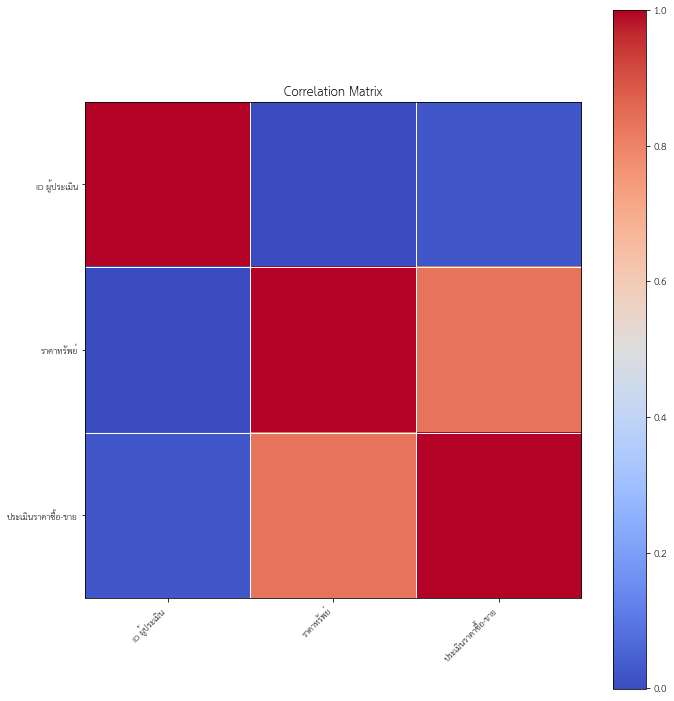

In [156]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

corr = data11.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='coolwarm')
plt.show()

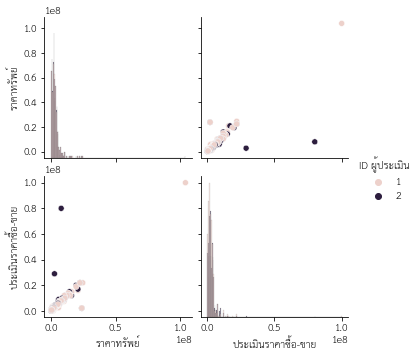

In [157]:
sns.pairplot(data11, hue="ID ผู้ประเมิน", diag_kind="hist") 

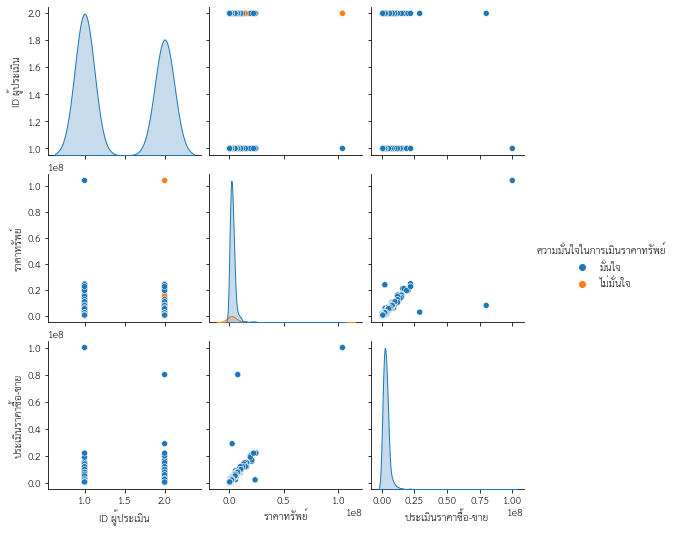

In [158]:
sns.pairplot(data11, hue="ความมั่นใจในการเมินราคาทรัพย์") 

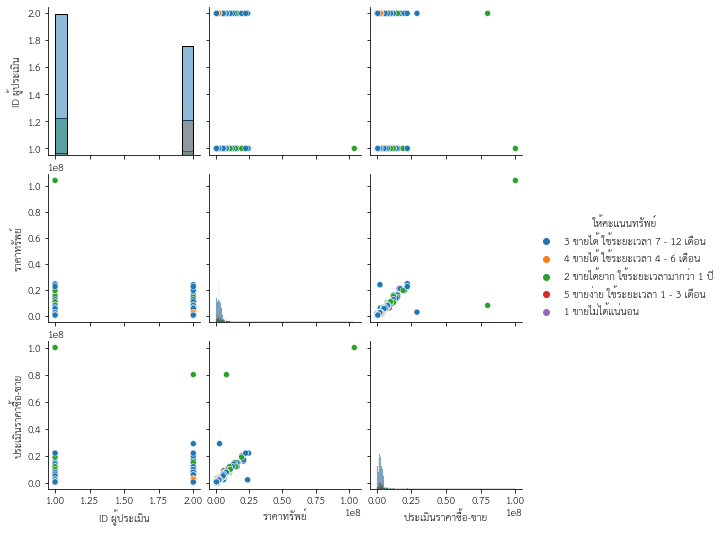

In [159]:
sns.pairplot(data11, hue="ให้คะแนนทรัพย์", diag_kind="hist") 

##ที่ดิน

In [161]:
data21 = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='land')
data21.corr(method='pearson')

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000,0.023654,0.047823
ราคาทรัพย์,0.023654,1.000000,0.759001
ประเมินราคาซื้อ-ขาย,0.047823,0.759001,1.000000


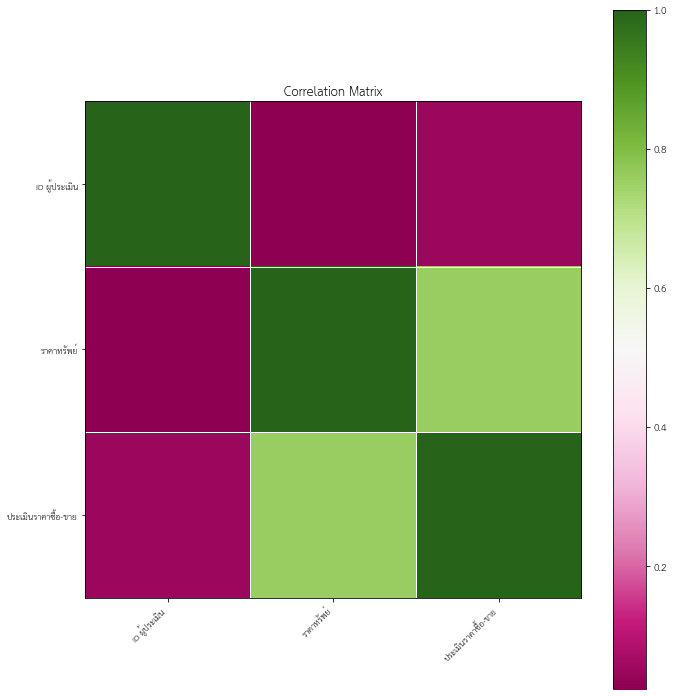

In [162]:
corr = data21.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='PiYG')
plt.show()

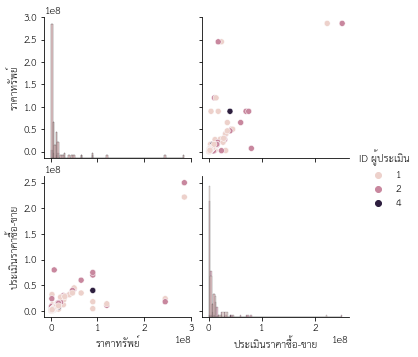

In [163]:
sns.pairplot(data21, hue="ID ผู้ประเมิน", diag_kind="hist") 

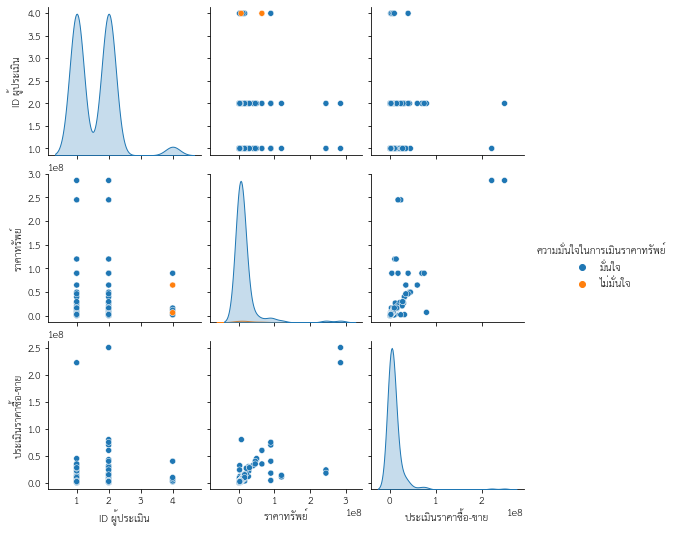

In [164]:
sns.pairplot(data21, hue="ความมั่นใจในการเมินราคาทรัพย์") 

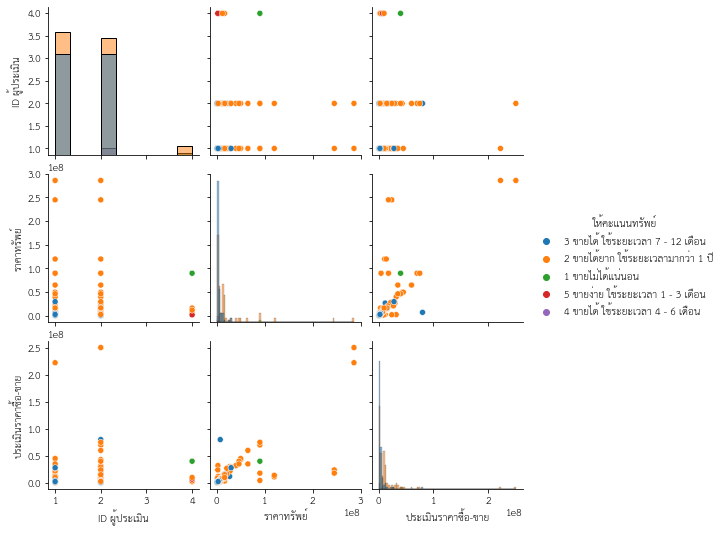

In [165]:
sns.pairplot(data21, hue="ให้คะแนนทรัพย์", diag_kind="hist") 

##คอนโด

In [166]:
data31 = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='condo')
data31.corr(method='pearson')

,ID ผู้ประเมิน,post id,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,Unnamed: 9
ID ผู้ประเมิน,NaN,NaN,NaN,NaN,NaN,NaN
post id,NaN,1.000000,-0.075167,-0.521308,NaN,-0.228785
ราคาทรัพย์,NaN,-0.075167,1.000000,0.791014,NaN,-0.620586
ประเมินราคาซื้อ-ขาย,NaN,-0.521308,0.791014,1.000000,NaN,-0.222711
เหตุผลไม่มั่นใจราคาประเมิน,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,NaN,-0.228785,-0.620586,-0.222711,NaN,1.000000


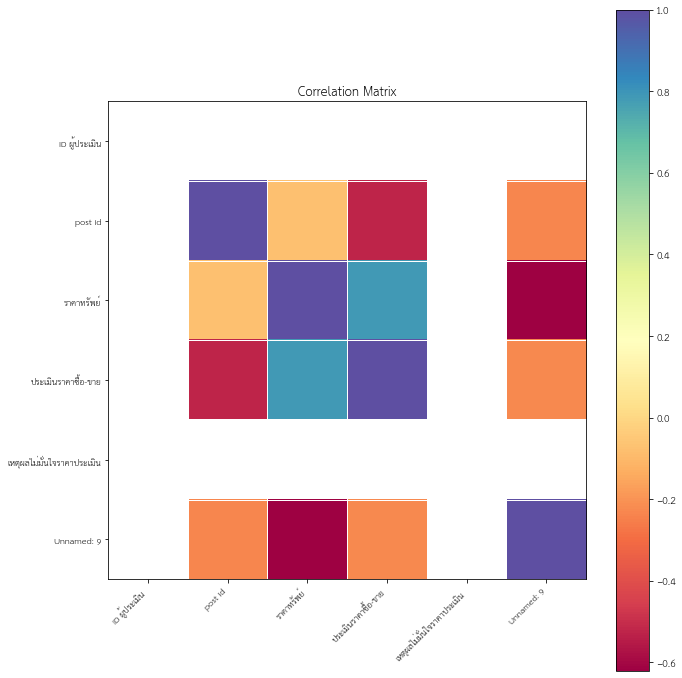

In [167]:
corr = data31.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='Spectral')
plt.show()

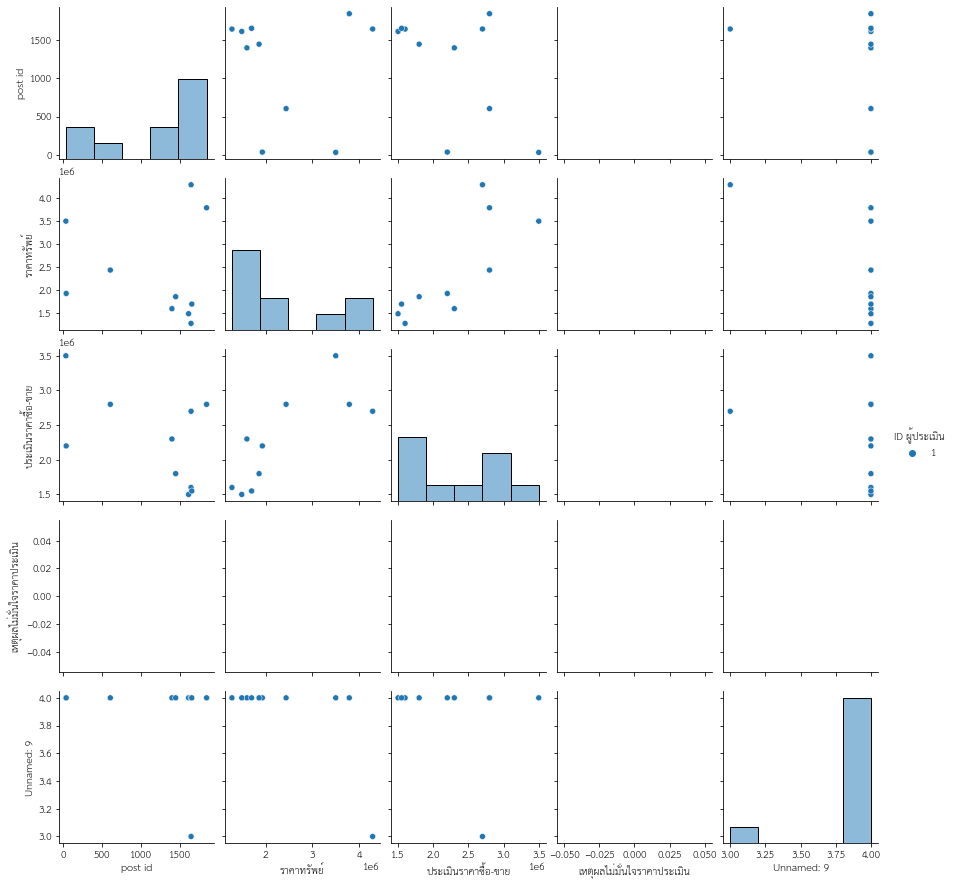

In [168]:
sns.pairplot(data31, hue="ID ผู้ประเมิน", diag_kind="hist") 

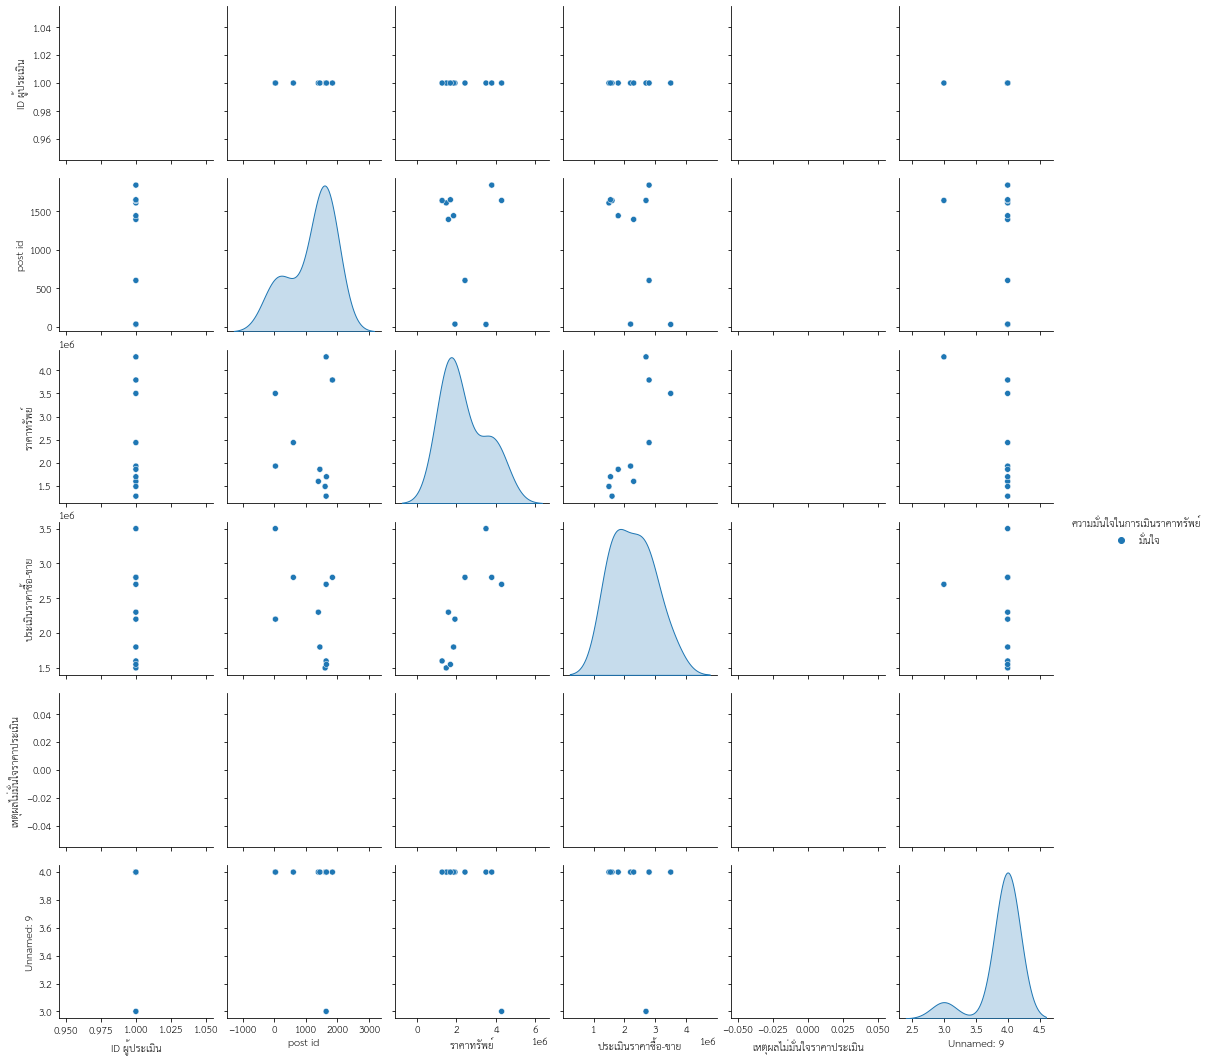

In [169]:
sns.pairplot(data31, hue="ความมั่นใจในการเมินราคาทรัพย์") 

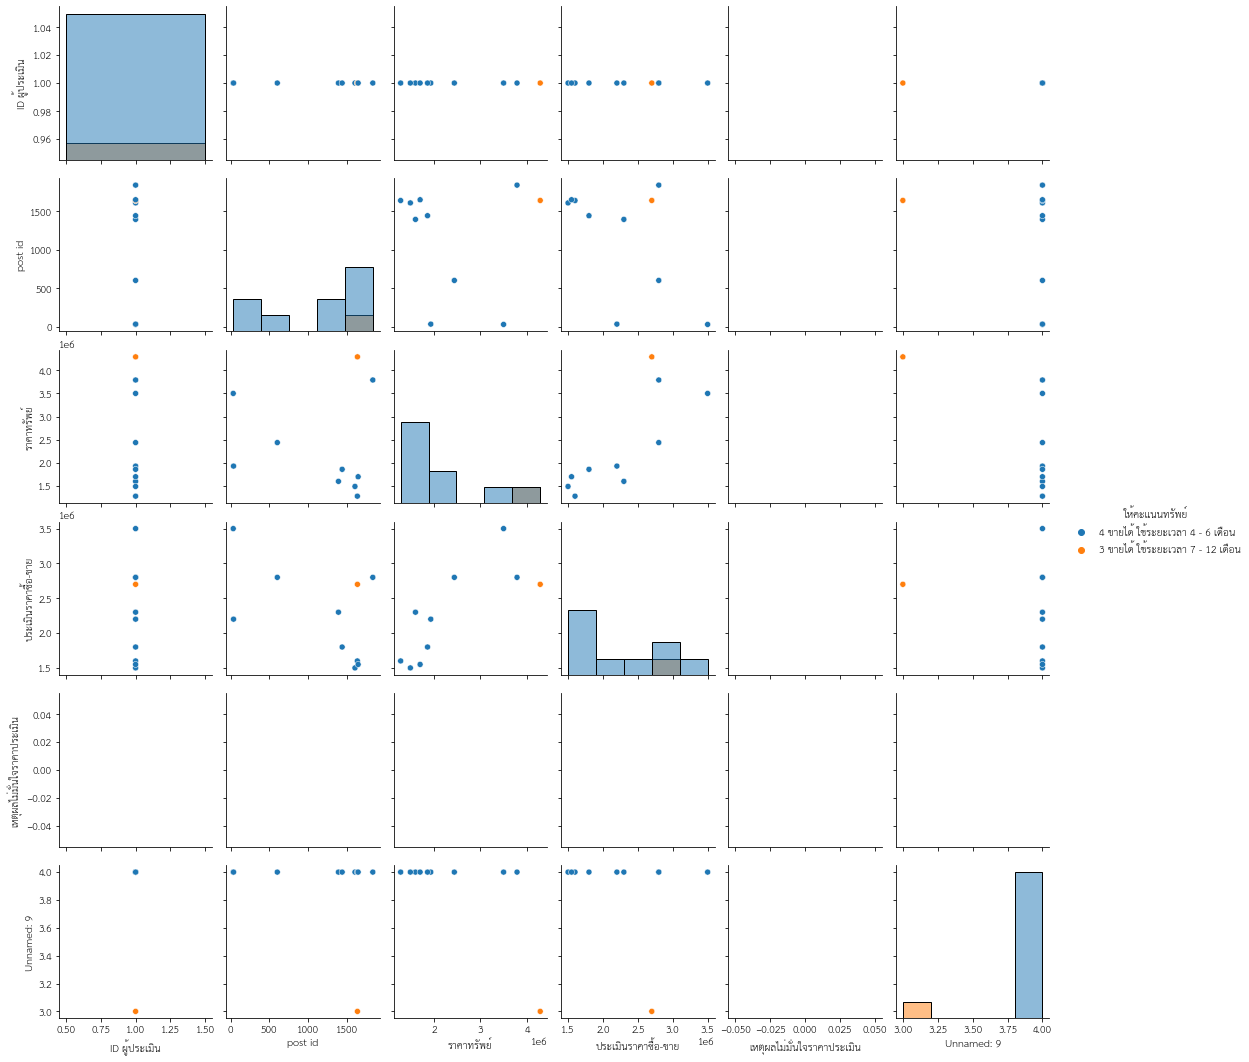

In [170]:
sns.pairplot(data31, hue="ให้คะแนนทรัพย์", diag_kind="hist") 

##ทาวน์โฮม

In [171]:
data41 = pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='ทาวน์โฮม')
data41 = data41[['ID ผู้ประเมิน','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์','ความมั่นใจในการเมินราคาทรัพย์']]
data41.corr(method='pearson')

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000e+00,-3.337094e-16,-0.006154
ราคาทรัพย์,-3.337094e-16,1.000000e+00,0.925450
ประเมินราคาซื้อ-ขาย,-6.153582e-03,9.254497e-01,1.000000


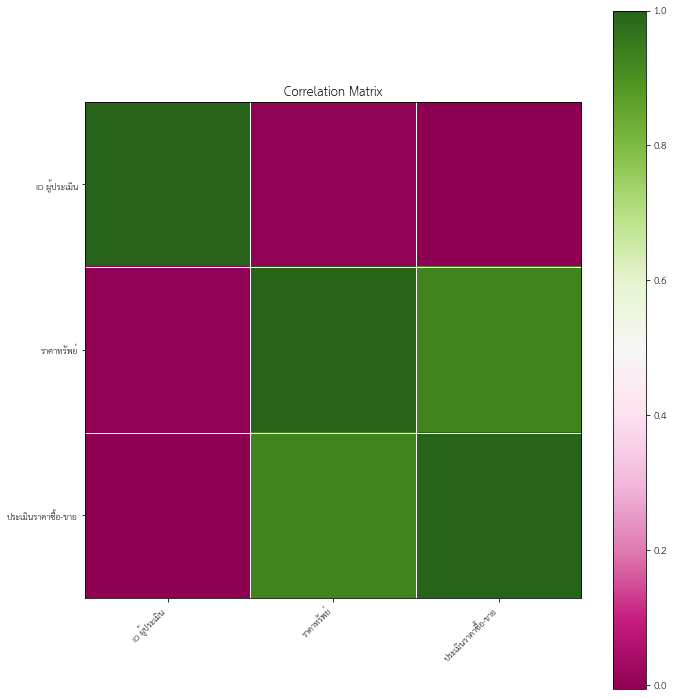

In [172]:
corr = data41.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='PiYG')
plt.show()

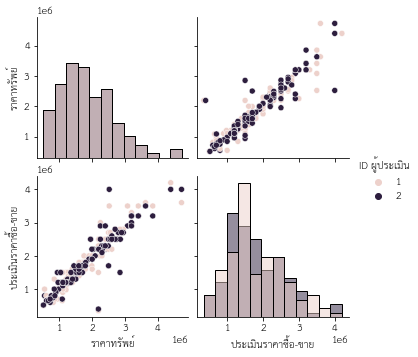

In [173]:
sns.pairplot(data41, hue="ID ผู้ประเมิน", diag_kind="hist") 

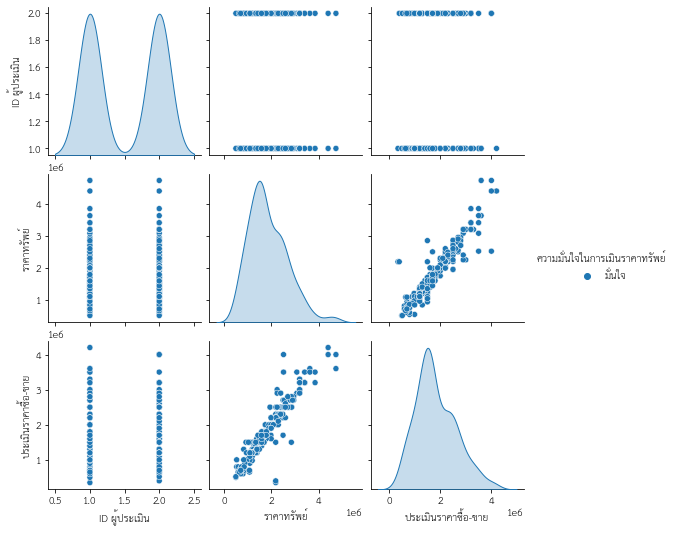

In [174]:
sns.pairplot(data41, hue="ความมั่นใจในการเมินราคาทรัพย์") 

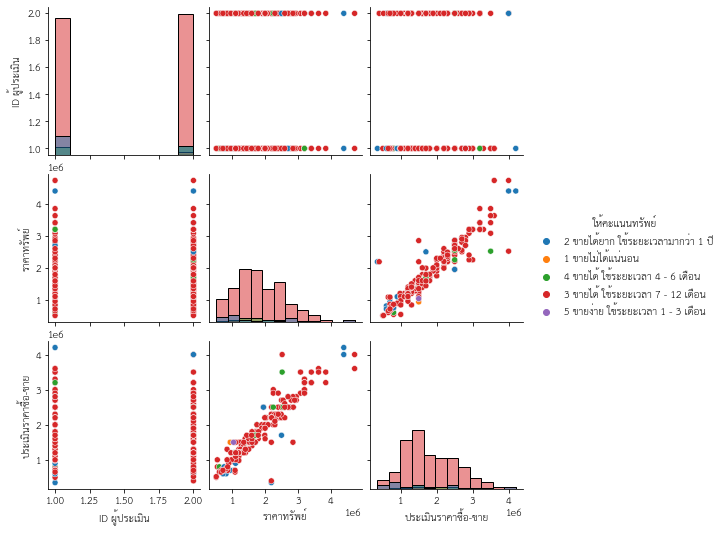

In [175]:
sns.pairplot(data41, hue="ให้คะแนนทรัพย์", diag_kind="hist") 

##อาคารพาณิชย์

In [176]:
import pandas as pd

In [177]:
data51 =pd.read_excel(f'https://docs.google.com/spreadsheets/d/1jIF55aFmr8rqqK7dBMXoyA71TWlHdIiiQAa0p1Dr794/export?format=xlsx', sheet_name ='อาคารพาณิชย์')
data51 = data51[['ID ผู้ประเมิน','ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์','ความมั่นใจในการเมินราคาทรัพย์']]
data51.corr()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ID ผู้ประเมิน,1.000000e+00,5.082630e-18,0.045325
ราคาทรัพย์,5.082630e-18,1.000000e+00,0.939407
ประเมินราคาซื้อ-ขาย,4.532517e-02,9.394070e-01,1.000000


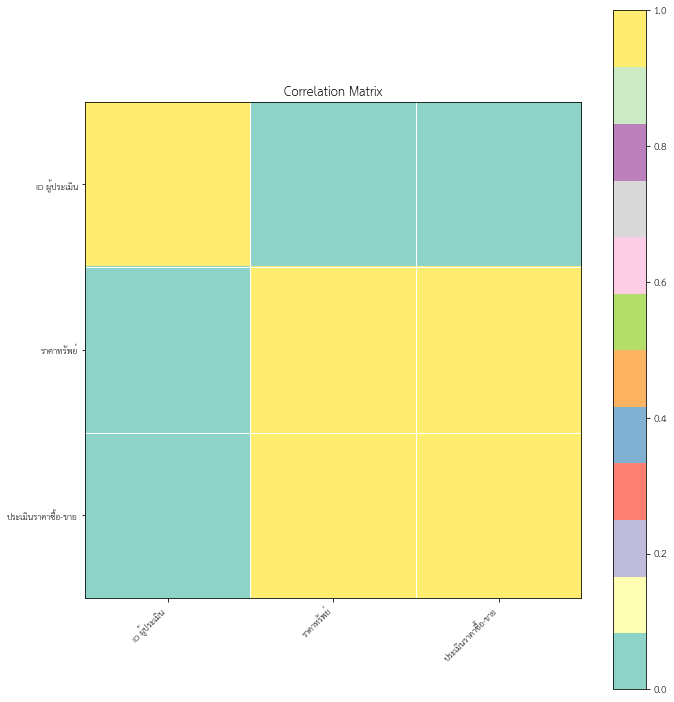

In [178]:
corr = data51.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns), cmap='Set3')
plt.show()

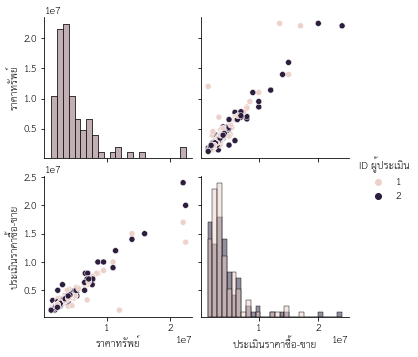

In [179]:
sns.pairplot(data51, hue="ID ผู้ประเมิน", diag_kind="hist") 

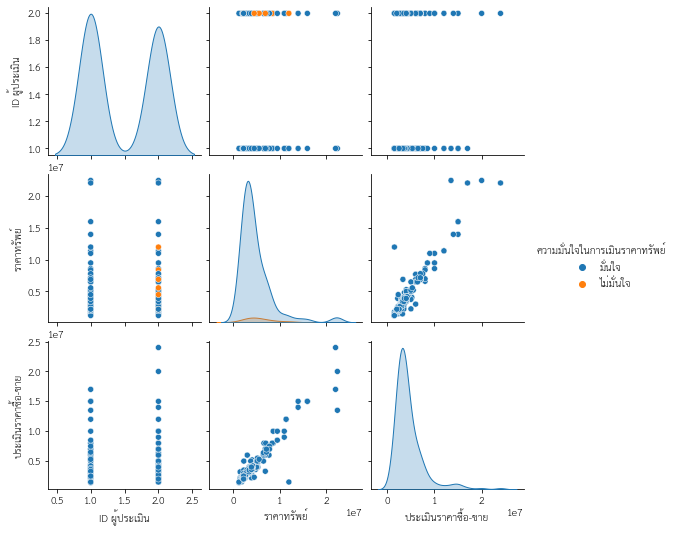

In [180]:
sns.pairplot(data51, hue="ความมั่นใจในการเมินราคาทรัพย์") 

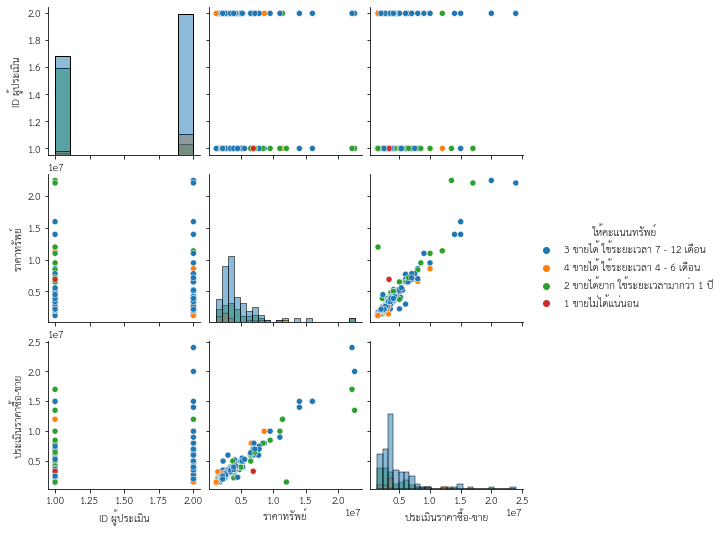

In [181]:
sns.pairplot(data51, hue="ให้คะแนนทรัพย์", diag_kind="hist")